<a href="https://colab.research.google.com/github/dlaswanda/Final-Paper/blob/main/Final_Paper_Deforestation_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Indonesia's Deforestation Rate

One of the longest lingering challenges to life on earth is the massive deforestation trend happening accross the globe for decades. Humans have long used wood and wood-derived products for sustinance and construction, with one paper claiming that [humans have used wood for structural uses since 400,000 years ago](https://https://www.nature.com/articles/s41586-023-06557-9).


That being said, the industrial revolution and the subsequent digital era have paved the way towards more deforestation. As human population grows, need for space too grows. Spaces for housing, agriculture, and transportation infrastructure have significantly reduced tree coverage all across the globe.


None is more apparent than in Indonesia. Indonesia, home to the world’s third largest tropical forest after the Amazon and the Congo Basin,  has experienced some of the fastest rates of deforestation in recent decades. Between 2001 and 2024 alone, the country [lost over 32 million hectares of tree cover](https://www.globalforestwatch.org/dashboards/country/IDN/), with much of this loss happening in biodiversity rich areas such as Kalimantan and Sumatra. There have been many explanations on why this happens, but the prevailing cause is agricultural expansion for palm oil and pulpwood. Furthermore, smallholder farming, logging concessions, and infrastructure development as [additional structural drivers](https://https://nicholas.duke.edu/news/palm-oil-not-only-driver-forest-loss-indonesia) of this trend. These pressures are further compounded by weak enforcement of land-use regulations and the political economy of resource rents, where short-term economic gains often take precedence over long-term ecological sustainability.

Beyond the immediate loss of biodiversity and ecosystem services, Indonesia’s forests are also one of the largest above ground carbon sinks, so their destruction accelerates greenhouse gas emissions and harms global climate goals. Moreover, forest loss disproportionately affects indigenous and rural communities who rely on forest resources for livelihood and cultural identity, highlighting how environmental change intersects with issues of equity and justice.





# Problem Statement

Despite Indonesia’s  commitments to reduce deforestation and its role as a critical actor in global climate agreements, forest loss remains persistent and unevenly distributed across provinces and districts. National statistics often obscure the localized intensity of deforestation and its associated carbon emissions, making it difficult to design policies that effectively target the most critical hotspots. This raises the question that this paper seeks to answer: how has deforestation in Indonesia evolved spatially and temporally over the past two decades, and what do these patterns reveal about where policy interventions should be prioritized?

# Method and Data

In analyzing these trends, this paper uses [data sourced](https://https://gfw2-data.s3.amazonaws.com/country-pages/country_stats/download/2024/IDN.xlsx) from Global Forest Watch (GFW). GFW is an online platform that provides open source deforestation and forest fire data around the world. The dataset for Indonesia includes tree cover loss rates from 2001 to 2024 and also average carbon emissions in the same time frame.

From this data, I utilized Python to clean, structure, and analyze the provincial and district-level time series. The analysis relied on reshaping the dataset into a long format, computing derived indicators such as tree cover loss per 1,000 hectares of baseline forest area and emissions per hectare lost, and aggregating trends across years.

Visualization libraries were used to generate line charts, bar plots, and choropleth maps, enabling both temporal and spatial perspectives of Indonesia’s deforestation. By using Python within a Streamlit framework, the analysis was also made interactive, allowing users to explore deforestation patterns by province, year, and metric of interest.



# Setting up charts and Streamlit

In [9]:
#Porting Data
import pandas as pd
csv_url = "https://raw.githubusercontent.com/dlaswanda/Final-Paper/refs/heads/main/Deforestation%20Dataset.csv"
indonesia_df = pd.read_csv(csv_url)
indonesia_df.head(10)

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e,gfw_forest_carbon_gross_emissions_2024__Mg_CO2e
0,Indonesia,Aceh,0,5683650,5683650,5683650,129164,18402,11039,11858,...,0,0,0,0,0,0,0,0,0,0
1,Indonesia,Aceh,10,5683650,5090906,4996298,129164,18325,10988,11830,...,0,0,0,0,0,0,0,0,0,0
2,Indonesia,Aceh,15,5683650,5050168,4946855,129164,18309,10974,11827,...,0,0,0,0,0,0,0,0,0,0
3,Indonesia,Aceh,20,5683650,5029128,4932162,129164,18297,10966,11822,...,0,0,0,0,0,0,0,0,0,0
4,Indonesia,Aceh,25,5683650,5014670,4908701,129164,18289,10961,11818,...,0,0,0,0,0,0,0,0,0,0
5,Indonesia,Aceh,30,5683650,4984708,4879169,129164,18278,10952,11816,...,20419815,29597570,26984846,27851704,17771125,18601460,18974147,16989501,23348363,28174569
6,Indonesia,Aceh,50,5683650,4865387,4716584,129164,18163,10872,11772,...,20209715,29122951,26512542,27361072,17462940,18198939,18648172,16674395,22830928,27517947
7,Indonesia,Aceh,75,5683650,4516637,4360782,129164,17429,10365,11449,...,18688911,26581202,24303168,24904708,15968848,16312090,16916321,15183764,20205951,24343374
8,Indonesia,Bali,0,559070,559070,559070,4012,430,319,181,...,0,0,0,0,0,0,0,0,0,0
9,Indonesia,Bali,10,559070,392005,416881,4012,425,314,179,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Cleaning up data

df.dtypes

df.isnull().sum().sort_values(ascending=False)

,0
country,0
subnational1,0
threshold,0
area_ha,0
extent_2000_ha,0
extent_2010_ha,0
gain_2000-2012_ha,0
tc_loss_ha_2001,0
tc_loss_ha_2002,0
tc_loss_ha_2003,0


## Creating Charts

In [13]:
# Making a line chart showing the progression of tree cover loss rate in Indonesia from 2001 to 2024

# Identify the columns that represent tree cover loss for each year
loss_columns = [col for col in indonesia_df.columns if col.startswith('tc_loss_ha_') and col.split('_')[-1].isdigit()]
years = [col.split('_')[-1] for col in loss_columns]

# Calculate the total initial extent for all of Indonesia (sum across all rows)
total_initial_extent = indonesia_df['extent_2000_ha'].sum()

# Calculate the total tree cover loss for each year for all of Indonesia
total_loss_over_time = indonesia_df[loss_columns].sum()

# Calculate the average loss rate for all of Indonesia for each year
# Using total loss / total initial extent for the entire country
average_loss_rate_over_time = (total_loss_over_time / total_initial_extent) * 100

# Create a DataFrame for plotting
time_series_df = pd.DataFrame({'Year': years, 'Average Loss Rate (%)': average_loss_rate_over_time.values})

# Convert 'Year' to numeric for proper sorting in the plot
time_series_df['Year'] = pd.to_numeric(time_series_df['Year'])
time_series_df = time_series_df.sort_values(by='Year')

import plotly.express as px
# Create the time series plot
fig = px.line(time_series_df, x='Year', y='Average Loss Rate (%)', title='Average Tree Cover Loss Rate in Indonesia Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Tree Cover Loss Rate (%)')
display(fig)

In [18]:
# Mapping the top 20 provinces with the highest tree cover loss rate

# Calculate the total tree cover loss for each region across all years
region_loss_over_time = indonesia_df.groupby('subnational1')[loss_columns].sum()

# Calculate the total initial extent for each region
region_initial_extent = indonesia_df.groupby('subnational1')['extent_2000_ha'].sum()

# Calculate the average loss rate for each region
average_loss_rate_per_region = (region_loss_over_time.sum(axis=1) / region_initial_extent) * 100

# Create a DataFrame for plotting
region_loss_df = average_loss_rate_per_region.sort_values(ascending=False).reset_index()
region_loss_df.columns = ['subnational1', 'loss_rate'] # Rename columns to match the merge key and the expected column name

# Store the result in a variable that can be accessed by the next cell
indonesia_region_loss_rate = region_loss_df

# Create the bar chart
fig = px.bar(region_loss_df, x='subnational1', y='loss_rate', title='Average Tree Cover Loss Rate by Region in Indonesia (2001-2024)')
fig.update_layout(xaxis_title='Region', yaxis_title='Average Tree Cover Loss Rate (%)')
display(fig)

In [14]:
# Mapping the top 20 provinces with the highest emissions

# Re-create indonesia_df by filtering the original df to ensure all columns are present
indonesia_df = df[df['country'] == 'Indonesia'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Print columns of indonesia_df for debugging
print("Columns in indonesia_df:", indonesia_df.columns.tolist())

# Identify the latest carbon emission column by looking for columns starting with the pattern
# and containing digits for the year.
emission_columns = [col for col in indonesia_df.columns if col.startswith('gfw_forest_carbon_gross_emissions_') and col.split('_')[5].isdigit()]

if emission_columns: # Check if the list is not empty
    latest_emission_column = sorted(emission_columns)[-1] # Get the latest year's emission column

    if 'subnational1' in indonesia_df.columns and latest_emission_column in indonesia_df.columns:
        # Group by subnational region and calculate the MEAN carbon emissions for the latest year
        indonesia_region_emissions = indonesia_df.groupby('subnational1')[latest_emission_column].mean().sort_values(ascending=False).reset_index()

        fig = px.bar(indonesia_region_emissions.head(20), x='subnational1', y=latest_emission_column,
                     title=f'Top 20 Regions by Average Carbon Emissions in Indonesia ({latest_emission_column.split("_")[5]})')
        fig.update_layout(xaxis_title='Region', yaxis_title='Average Carbon Emissions (Mg CO2e)')
        display(fig)
    else:
        print(f"Could not find one or both required columns ('subnational1', or '{latest_emission_column}'). Please check your dataset.")
else:
    print("Could not find any carbon emission columns in the dataset.")

Columns in indonesia_df: ['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2012_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023', 'tc_loss_ha_2024', 'gfw_forest_carbon_gross_emissions_2001__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2002__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2003__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2004__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2006__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2007__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2008__Mg_CO2e', 'g

In [19]:
# Comparing average regional carbon emissions with the average regional tree cover loss rates.

import plotly.express as px

# Ensure both indonesia_region_emissions and indonesia_region_loss_rate DataFrames are available
# These should have been created in previous steps (calculating average emissions per region and average loss rate per region).

if 'indonesia_region_emissions' in locals() and not indonesia_region_emissions.empty and \
   'indonesia_region_loss_rate' in locals() and not indonesia_region_loss_rate.empty:

    # Merge the two dataframes on the region column ('subnational1')
    # Assuming the loss rate dataframe has a column named 'loss_rate' and the emissions dataframe
    # has a column with the latest emission data (e.g., 'gfw_forest_carbon_gross_emissions_2024__Mg_CO2e')
    # Let's find the name of the latest emission column from the emissions dataframe
    emission_col_name = indonesia_region_emissions.columns[1] # Assuming the second column is the emission data

    regional_comparison_df = pd.merge(indonesia_region_loss_rate[['subnational1', 'loss_rate']],
                                    indonesia_region_emissions[['subnational1', emission_col_name]],
                                    on='subnational1',
                                    how='inner')

    # Rename the emission column for clarity in the plot
    regional_comparison_df = regional_comparison_df.rename(columns={emission_col_name: 'Average Carbon Emissions (Mg CO2e)'})


    # Create a scatter plot to visualize the relationship
    fig = px.scatter(regional_comparison_df,
                     x='loss_rate',
                     y='Average Carbon Emissions (Mg CO2e)',
                     text='subnational1', # Show region name on hover
                     title='Regional Tree Cover Loss Rate vs. Average Carbon Emissions in Indonesia')

    fig.update_layout(xaxis_title='Average Tree Cover Loss Rate (%)',
                      yaxis_title='Average Carbon Emissions (Mg CO2e)')

    fig.update_traces(textposition='top center')

    display(fig)

else:
    print("Could not find both regional emissions and regional loss rate data. Please ensure the previous steps to calculate these have been run successfully.")

In [23]:
# Analyze which regions have improved the most

# Ensure the improving_regions_loss_rates DataFrame is available
if 'improving_regions_loss_rates' in locals() and not improving_regions_loss_rates.empty:

    # Calculate the total loss in the first and last two years of the 5-year period for each improving region
    # This is a simplified approach to quantify the decrease. A more rigorous method could involve linear regression.
    first_two_years_cols = last_5_years_loss_columns[:2]
    last_two_years_cols = last_5_years_loss_columns[-2:]

    initial_loss_in_period = improving_regions_loss_rates[first_two_years_cols].sum(axis=1)
    final_loss_in_period = improving_regions_loss_rates[last_two_years_cols].sum(axis=1)

    # Calculate the decrease in loss
    decrease_in_loss = initial_loss_in_period - final_loss_in_period

    # Create a DataFrame to show the decrease
    improvement_df = decrease_in_loss.sort_values(ascending=False).reset_index()
    improvement_df.columns = ['Region', 'Decrease in Tree Cover Loss Rate (%)']

    # Display the regions with the largest decrease
    print("Regions with the largest decrease in tree cover loss rate over the last 5 years:")
    display(improvement_df)

else:
    print("The 'improving_regions_loss_rates' data is not available. Please run the previous step to identify regions with decreasing loss.")

Regions with the largest decrease in tree cover loss rate over the last 5 years:


,Region,Decrease in Tree Cover Loss Rate (%)
0,Kepulauan Riau,1.014338
1,Papua,0.035347
2,Nusa Tenggara Timur,0.023305
3,Papua Barat,-0.002578
4,Sumatera Barat,-0.031059
5,Kalimantan Utara,-0.040565
6,Bali,-0.108354
7,Jawa Tengah,-0.170897
8,Maluku Utara,-0.186132
9,Maluku,-0.248678


In [54]:
# Create a year-over-year line chart for the top 5 improving regions

import plotly.express as px

# Ensure improving_regions_long_df and improvement_df are available
if 'improving_regions_long_df' in locals() and not improving_regions_long_df.empty and \
   'improvement_df' in locals() and not improvement_df.empty:

    # Get the names of the top 5 improving regions from the improvement_df
    top_5_regions_names = improvement_df['Region'].head(5).tolist()

    # Filter the improving_regions_long_df to include only the top 5 regions
    top_5_regions_yoy_df = improving_regions_long_df[improving_regions_long_df['subnational1'].isin(top_5_regions_names)]

    # Create the line chart
    fig = px.line(top_5_regions_yoy_df, x='Year', y='Tree Cover Loss Rate (%)', color='subnational1',
                  title='Year-over-Year Tree Cover Loss Rate for Top 5 Improving Regions (Last 5 Years)')

    fig.update_layout(xaxis_title='Year', yaxis_title='Tree Cover Loss Rate (%)', legend_title='Region')

    display(fig)

else:
    print("Required data (improving_regions_long_df or improvement_df) is not available. Please run the previous steps.")

In [55]:
# Create a year-over-year line chart for the 5 worst performing regions

import plotly.express as px
import pandas as pd

# Ensure regional_loss_rates_over_time and improvement_df are available
if 'regional_loss_rates_over_time' in locals() and not regional_loss_rates_over_time.empty and \
   'improvement_df' in locals() and not improvement_df.empty:

    # Get the names of the 5 worst performing regions from the improvement_df
    worst_5_regions_names = improvement_df['Region'].tail(5).tolist()

    # Filter the regional_loss_rates_over_time to include only the worst 5 regions
    worst_5_regions_yoy_df = regional_loss_rates_over_time.loc[worst_5_regions_names]

    # Melt the dataframe to long format for easier plotting with Plotly Express
    worst_5_regions_long_df = worst_5_regions_yoy_df.reset_index().rename(columns={'index': 'subnational1'}).melt(
        id_vars='subnational1', var_name='Year', value_name='Tree Cover Loss Rate (%)'
    )

    # Extract year from the column names and convert to numeric
    worst_5_regions_long_df['Year'] = worst_5_regions_long_df['Year'].str.split('_').str[-1].astype(int)

    # Create the line chart
    fig = px.line(worst_5_regions_long_df, x='Year', y='Tree Cover Loss Rate (%)', color='subnational1',
                  title='Year-over-Year Tree Cover Loss Rate for 5 Worst Performing Regions (Last 5 Years)')

    fig.update_layout(xaxis_title='Year', yaxis_title='Tree Cover Loss Rate (%)', legend_title='Region')

    display(fig)

else:
    print("Required data (regional_loss_rates_over_time or improvement_df) is not available. Please run the previous steps.")

In [30]:
# Generate a bar chart comparing the top 5 most improved regions and the bottom 5

import plotly.express as px
import pandas as pd

if 'improvement_df' in locals() and not improvement_df.empty:
    # Get the top 5 most improved regions (largest decrease)
    top_5_improved = improvement_df.head(5)

    # Get the bottom 5 regions (least improved, could be increasing loss)
    bottom_5_improved = improvement_df.tail(5)

    # Combine the top and bottom regions
    comparison_df = pd.concat([top_5_improved, bottom_5_improved])

    # Create the bar chart
    fig = px.bar(comparison_df,
                 x='Region',
                 y='Decrease in Tree Cover Loss Rate (%)',
                 color='Region', # Color bars by region to distinguish
                 title='Top 5 Most Improved and Bottom 5 Regions by Decrease in Tree Cover Loss Rate (Last 5 Years)')

    fig.update_layout(xaxis_title='Region',
                      yaxis_title='Decrease in Tree Cover Loss Rate (%)')

    display(fig)
else:
    print("The 'improvement_df' data is not available. Please run the previous step to calculate the decrease in loss.")

## Installing and Running Streamlit

In [31]:
!pip install streamlit geopandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 140.5 MB/s eta 0:00:00


In [39]:
# Download GeoJSON file for Indonesian provinces
geojson_url = "https://raw.githubusercontent.com/ardian28/GeoJson-Indonesia-38-Provinsi/refs/heads/main/Provinsi/38%20Provinsi%20Indonesia%20-%20Provinsi.json"
geojson_file_path = "/tmp/indonesia-province-simplified.geojson"

import requests

response = requests.get(geojson_url)
if response.status_code == 200:
    with open(geojson_file_path, 'w') as f:
        f.write(response.text)
    print(f"Downloaded GeoJSON to {geojson_file_path}")
else:
    print(f"Failed to download GeoJSON. Status code: {response.status_code}")
    geojson_file_path = None # Set to None if download fails

# Read the GeoJSON file into a GeoPandas DataFrame
if geojson_file_path:
    import geopandas as gpd
    try:
        indonesia_gdf = gpd.read_file(geojson_file_path)
        print("GeoJSON file read successfully.")
        display(indonesia_gdf.head())
    except Exception as e:
        print(f"Error reading GeoJSON file: {e}")
        indonesia_gdf = None
else:
    indonesia_gdf = None

Downloaded GeoJSON to /tmp/indonesia-province-simplified.geojson
GeoJSON file read successfully.


,id,KODE_PROV,PROVINSI,geometry
0,72,72,Sulawesi Tengah,"MULTIPOLYGON (((121.40722 -1.83695, 121.38471 ..."
1,76,76,Sulawesi Barat,"POLYGON ((119.56118 -0.8495, 119.53766 -0.8788..."
2,73,73,Sulawesi Selatan,"MULTIPOLYGON (((117.93711 -5.36279, 117.92847 ..."
3,91-D,91,Papua Tengah,"MULTIPOLYGON (((134.82233 -2.68285, 134.8075 -..."
4,92-A,92,Papua Barat,"MULTIPOLYGON (((132.47009 -2.62477, 132.45209 ..."


In [52]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import geopandas as gpd
import json
import requests # Import requests to fetch geojson

# Define data loading and processing functions within the Streamlit app

@st.cache_data
def load_data():
    csv_url = "https://raw.githubusercontent.com/dlaswanda/Final-Paper/refs/heads/main/Deforestation%20Dataset.csv"
    geojson_url = "https://raw.githubusercontent.com/ardian28/GeoJson-Indonesia-38-Provinsi/refs/heads/main/Provinsi/38%20Provinsi%20Indonesia%20-%20Provinsi.json"

    try:
        # Load main deforestation data
        indonesia_df = pd.read_csv(csv_url)
        df = indonesia_df[indonesia_df['country'] == 'Indonesia'].copy()

        # --- Start of added code for renaming provinces ---
        # Rename provinces in the deforestation data to match GeoJSON
        province_rename_map = {
            'Jakarta Raya': 'DKI Jakarta',
            'Yogyakarta': 'Daerah Istimewa Yogyakarta',
             # Add other renames here if needed based on the warning message
             'Kepulauan Bangka Belitung': 'Bangka Belitung', # Assuming this is the correct name in GeoJSON

        }
        df['subnational1'] = df['subnational1'].replace(province_rename_map)
        # --- End of added code for renaming provinces ---


        # Calculate time series data
        loss_columns = [col for col in df.columns if col.startswith('tc_loss_ha_') and col.split('_')[-1].isdigit()]
        years = [col.split('_')[-1] for col in loss_columns]
        total_initial_extent = df['extent_2000_ha'].sum()
        total_loss_over_time = df[loss_columns].sum()
        average_loss_rate_over_time = (total_loss_over_time / total_initial_extent) * 100
        time_series_df = pd.DataFrame({'Year': years, 'Average Loss Rate (%)': average_loss_rate_over_time.values})
        time_series_df['Year'] = pd.to_numeric(time_series_df['Year'])
        time_series_df = time_series_df.sort_values(by='Year')


        # Calculate regional loss rate data
        region_initial_extent = df.groupby('subnational1')['extent_2000_ha'].sum()
        regional_loss_over_time = df.groupby('subnational1')[loss_columns].sum()
        average_loss_rate_per_region = (regional_loss_over_time.sum(axis=1) / region_initial_extent) * 100
        region_loss_df = average_loss_rate_per_region.sort_values(ascending=False).reset_index()
        region_loss_df.columns = ['subnational1', 'loss_rate']


        # Calculate regional emissions data (using the latest year)
        emission_columns = [col for col in df.columns if col.startswith('gfw_forest_carbon_gross_emissions_') and col.split('_')[5].isdigit()]
        regional_emissions_df = pd.DataFrame()
        if emission_columns:
            latest_emission_column = sorted(emission_columns)[-1]
            regional_emissions_df = df.groupby('subnational1')[latest_emission_column].mean().sort_values(ascending=False).reset_index()


        # Calculate improvement data (regions with decreasing loss)
        regional_loss_rates_over_time = (regional_loss_over_time.divide(region_initial_extent, axis=0)) * 100
        last_5_years_loss_columns = loss_columns[-5:]
        improvement_df = pd.DataFrame()
        improving_regions_long_df = pd.DataFrame()

        if len(last_5_years_loss_columns) >= 2:
            latest_year_col = last_5_years_loss_columns[-1]
            preceding_years_cols = last_5_years_loss_columns[:-1]

            average_loss_preceding_years = regional_loss_rates_over_time[preceding_years_cols].mean(axis=1)

            regions_with_decreasing_loss = regional_loss_rates_over_time[regional_loss_rates_over_time[latest_year_col] < average_loss_preceding_years].index.tolist()

            if regions_with_decreasing_loss:
                improving_regions_loss_rates = regional_loss_rates_over_time.loc[regions_with_decreasing_loss]
                initial_loss_in_period = improving_regions_loss_rates[preceding_years_cols].sum(axis=1)
                final_loss_in_period = improving_regions_loss_rates[last_5_years_loss_columns[-2:]].sum(axis=1)
                decrease_in_loss = initial_loss_in_period - final_loss_in_period
                improvement_df = decrease_in_loss.sort_values(ascending=False).reset_index()
                improvement_df.columns = ['Region', 'Decrease in Tree Cover Loss Rate (%)']

                improving_regions_loss_rates_reset = improving_regions_loss_rates.reset_index().rename(columns={'index': 'subnational1'})
                improving_regions_long_df = improving_regions_loss_rates_reset.melt(id_vars='subnational1', var_name='Year', value_name='Tree Cover Loss Rate (%)')
                improving_regions_long_df['Year'] = improving_regions_long_df['Year'].str.split('_').str[-1].astype(int)


        # Load GeoJSON data and merge with regional loss data
        # Fetch GeoJSON data as a dictionary
        geojson_response = requests.get(geojson_url)
        if geojson_response.status_code == 200:
            indonesia_geojson = geojson_response.json()
            # Load into GeoDataFrame temporarily for easier merging
            indonesia_gdf = gpd.GeoDataFrame.from_features(indonesia_geojson['features'])

            # Merge GeoJSON with regional loss data
            # Ensure 'PROVINSI' in geojson matches 'subnational1' in data for merging
            indonesia_merged_gdf = indonesia_gdf.merge(region_loss_df,
                                                       left_on='PROVINSI',
                                                       right_on='subnational1',
                                                       how='left')
            # Handle potential NaN values in 'loss_rate'
            indonesia_merged_gdf['loss_rate'] = indonesia_merged_gdf['loss_rate'].fillna(0)

        else:
            st.error(f"Failed to load GeoJSON data. Status code: {geojson_response.status_code}")
            indonesia_geojson = None
            indonesia_merged_gdf = None


        return time_series_df, region_loss_df, regional_emissions_df, improvement_df, improving_regions_long_df, indonesia_merged_gdf, indonesia_geojson

    except Exception as e:
        st.error(f"Error loading or processing data: {e}")
        return None, None, None, None, None, None, None


def main():
    st.title("Indonesia's Deforestation Rate Analysis")

    # Load all data
    time_series_df, region_loss_df, regional_emissions_df, improvement_df, improving_regions_long_df, indonesia_merged_gdf, indonesia_geojson = load_data()

    if indonesia_merged_gdf is not None and indonesia_geojson is not None:
        st.header("Deforestation Rate by Province")
        fig_map = px.choropleth(indonesia_merged_gdf,
                               geojson=indonesia_geojson, # Use the fetched geojson dictionary
                               locations="PROVINSI", # Use the column from the dataframe that matches featureidkey
                               featureidkey="properties.PROVINSI", # Key in geojson properties to match with locations
                               color="loss_rate",
                               hover_name="PROVINSI",
                               hover_data={"loss_rate": True, "subnational1": False},
                               title="Average Tree Cover Loss Rate by Province (2001-2024)",
                               color_continuous_scale="Viridis",
                               range_color=(0, indonesia_merged_gdf['loss_rate'].max()))

        fig_map.update_geos(fitbounds="locations", visible=False)
        fig_map.update_layout(margin={"r":0,"l":0,"b":0})
        st.plotly_chart(fig_map, use_container_width=True)


    if time_series_df is not None and not time_series_df.empty:
        st.header("Average Tree Cover Loss Rate Over Time")
        fig_time_series = px.line(time_series_df, x='Year', y='Average Loss Rate (%)', title='Average Tree Cover Loss Rate in Indonesia Over Time')
        fig_time_series.update_layout(xaxis_title='Year', yaxis_title='Average Tree Cover Loss Rate (%)')
        st.plotly_chart(fig_time_series, use_container_width=True)


    if region_loss_df is not None and not region_loss_df.empty:
        st.header("Average Tree Cover Loss Rate by Region (Top 20)")
        fig_region_loss = px.bar(region_loss_df.head(20), x='subnational1', y='loss_rate', title='Average Tree Cover Loss Rate by Region in Indonesia (2001-2024)')
        fig_region_loss.update_layout(xaxis_title='Region', yaxis_title='Average Tree Cover Loss Rate (%)')
        st.plotly_chart(fig_region_loss, use_container_width=True)


    if regional_emissions_df is not None and not regional_emissions_df.empty:
        st.header("Average Carbon Emissions by Region (Latest Year)")
        emission_col_name = regional_emissions_df.columns[1]
        fig_regional_emissions = px.bar(regional_emissions_df.head(20), x='subnational1', y=emission_col_name,
                     title=f'Top 20 Regions by Average Carbon Emissions in Indonesia ({emission_col_name.split("_")[5] if "_" in emission_col_name else "Latest Year"})')
        fig_regional_emissions.update_layout(xaxis_title='Region', yaxis_title='Average Carbon Emissions (Mg CO2e)')
        st.plotly_chart(fig_regional_emissions, use_container_width=True)


    if improvement_df is not None and not improvement_df.empty:
        st.header("Regions with Largest Decrease in Tree Cover Loss Rate (Last 5 Years)")
        top_5_improved = improvement_df.head(5)
        bottom_5_improved = improvement_df.tail(5)
        comparison_df = pd.concat([top_5_improved, bottom_5_improved])

        fig_improvement = px.bar(comparison_df,
                 x='Region',
                 y='Decrease in Tree Cover Loss Rate (%)',
                 color='Region',
                 title='Top 5 Most Improved and Bottom 5 Regions by Decrease in Tree Cover Loss Rate (Last 5 Years)')

        fig_improvement.update_layout(xaxis_title='Region',
                      yaxis_title='Decrease in Tree Cover Loss Rate (%)')
        st.plotly_chart(fig_improvement, use_container_width=True)

    if improving_regions_long_df is not None and not improving_regions_long_df.empty and improvement_df is not None and not improvement_df.empty:
        st.header("Year-over-Year Tree Cover Loss Rate for Top 5 Improving Regions")
        top_5_regions_names = improvement_df['Region'].head(5).tolist()
        top_5_regions_yoy_df = improving_regions_long_df[improving_regions_long_df['subnational1'].isin(top_5_regions_names)]

        fig_yoy = px.line(top_5_regions_yoy_df, x='Year', y='Tree Cover Loss Rate (%)', color='subnational1',
                  title='Year-over-Year Tree Cover Loss Rate for Top 5 Improving Regions (Last 5 Years)')

        fig_yoy.update_layout(xaxis_title='Year', yaxis_title='Tree Cover Loss Rate (%)', legend_title='Region')
        st.plotly_chart(fig_yoy, use_container_width=True)


if __name__ == "__main__":
    main()

Overwriting app.py


In [53]:
# Merge the GeoJSON data with the regional deforestation data

if indonesia_gdf is not None and 'indonesia_region_loss_rate' in locals():
    # Ensure province names match for merging
    # It's important to inspect both dataframes and standardize province names if necessary.
    # For this example, let's assume the province names in 'PROVINSI' of indonesia_gdf
    # match the 'subnational1' column in indonesia_region_loss_rate.
    # If they don't match, you might need to create a mapping or use string manipulation.

    # Perform the merge
    # Using 'PROVINSI' from indonesia_gdf and 'subnational1' from indonesia_region_loss_rate
    indonesia_merged_gdf = indonesia_gdf.merge(indonesia_region_loss_rate,
                                               left_on='PROVINSI',
                                               right_on='subnational1',
                                               how='left')

    # Display the merged GeoDataFrame
    print("Merged GeoDataFrame:")
    display(indonesia_merged_gdf.head())

    # Check for provinces that didn't merge
    unmatched_provinces = indonesia_merged_gdf[indonesia_merged_gdf['subnational1'].isnull()]['PROVINSI'].tolist()
    if unmatched_provinces:
        print(f"\nWarning: The following provinces from the GeoJSON did not find a match in the deforestation data: {unmatched_provinces}")
        print("Please check province name consistency between the GeoJSON and your deforestation data.")
else:
    print("GeoJSON data or regional loss rate data is not available. Please ensure previous steps were successful.")

Merged GeoDataFrame:


,id,KODE_PROV,PROVINSI,geometry,subnational1,loss_rate
0,72,72,Sulawesi Tengah,"MULTIPOLYGON (((121.40722 -1.83695, 121.38471 ...",Sulawesi Tengah,14.773773
1,76,76,Sulawesi Barat,"POLYGON ((119.56118 -0.8495, 119.53766 -0.8788...",Sulawesi Barat,18.052226
2,73,73,Sulawesi Selatan,"MULTIPOLYGON (((117.93711 -5.36279, 117.92847 ...",Sulawesi Selatan,11.949059
3,91-D,91,Papua Tengah,"MULTIPOLYGON (((134.82233 -2.68285, 134.8075 -...",NaN,NaN
4,92-A,92,Papua Barat,"MULTIPOLYGON (((132.47009 -2.62477, 132.45209 ...",Papua Barat,3.604958



Please check province name consistency between the GeoJSON and your deforestation data.


In [51]:
# Install cloudflared (one-time per runtime)
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb >/dev/null 2>&1 || true

# Run Streamlit in the background and expose it via Cloudflare Tunnel
import subprocess, time, re, sys

PORT = "8501"
streamlit = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", PORT, "--server.headless", "true"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)
time.sleep(2)

tunnel = subprocess.Popen(
    ["cloudflared", "tunnel", "--url", f"http://localhost:{PORT}", "--no-autoupdate"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)

print("Starting Cloudflare Tunnel… (keep this cell running)")
for line in tunnel.stdout:
    sys.stdout.write(line)
    sys.stdout.flush()
    # The public URL looks like: https://<random>.trycloudflare.com
    m = re.search(r"https://[a-z0-9-]+\.trycloudflare\.com", line)
    if m:
        print("\n🚀 Streamlit app URL:", m.group(0))
        print("No password required. Keep this cell running while you use the app.")
        break

Starting Cloudflare Tunnel… (keep this cell running)
2025-10-26T02:51:24Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-10-26T02:51:24Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-10-26T02:51:28Z INF +--------------------------------------------------------------------------------------------+
2025-10-26T02:51:28Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-10-26T02:51:28Z INF |  

# Analysis of Charts

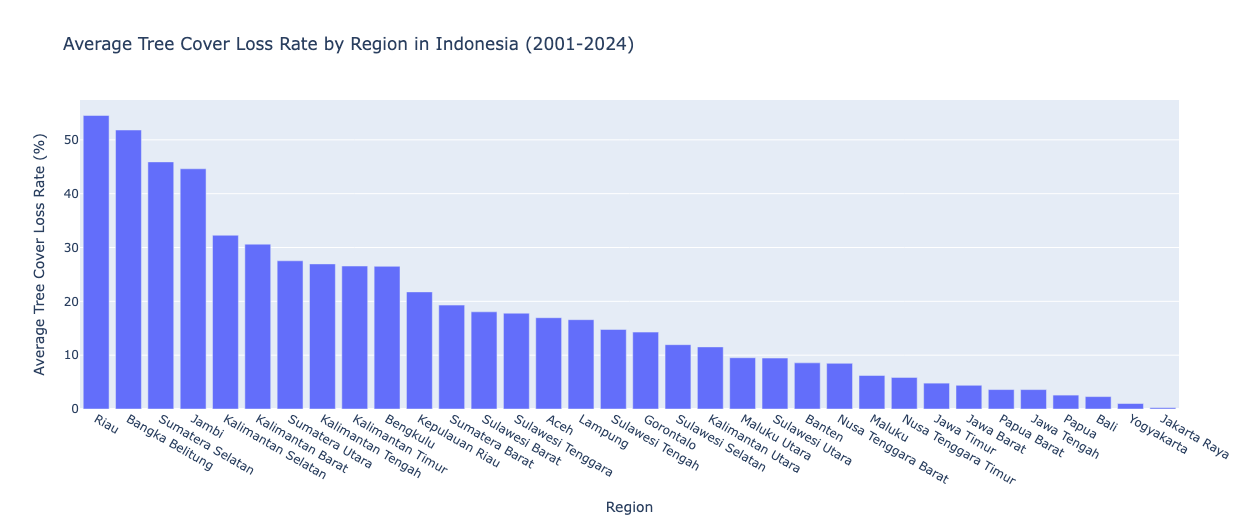

Riau, Bangka Belitung, and several Sumatran provinces have the highest average deforestation rates over the past two decades, while Java, Bali, and Yogyakarta show minimal loss. This reflects the spatial imbalance of deforestation pressures, with outer islands disproportionately affected.

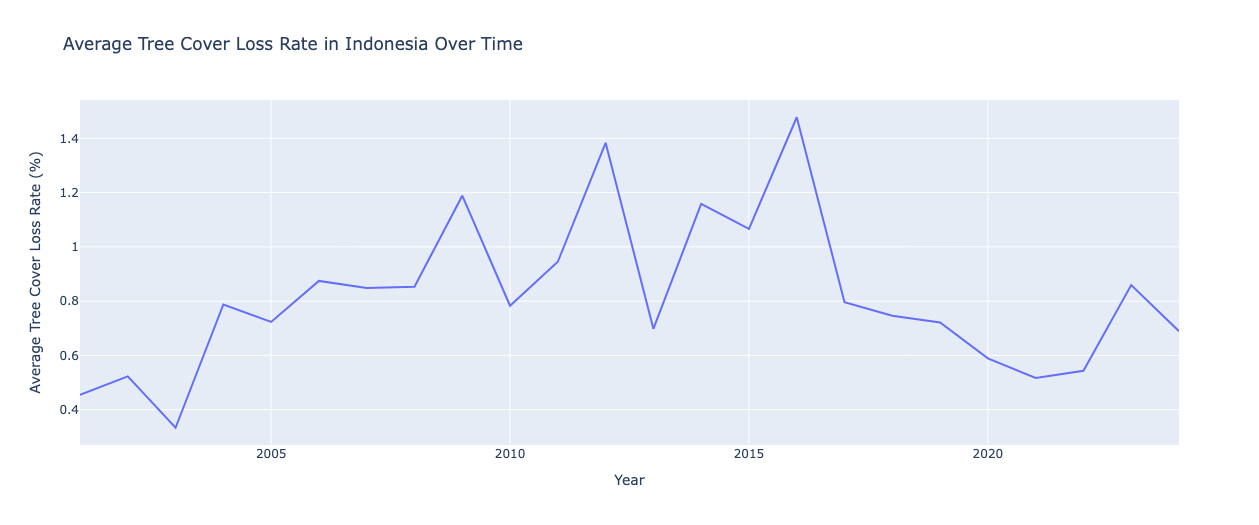

At the national level, Indonesia’s tree cover loss rate peaked in the mid-2010s, followed by a general decline into the early 2020s. However, recent years show variability, suggesting that while some progress has been made, national-level gains are fragile and reversible.

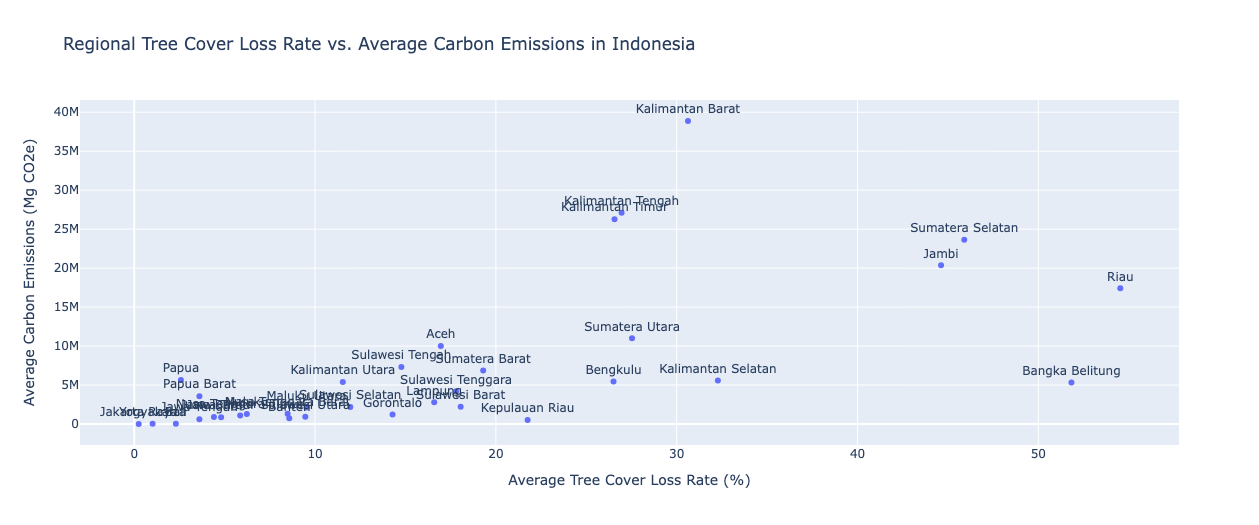

The scatter plot highlights a divergence between tree-cover loss rates and carbon emissions. Riau, Jambi, and Sumatera Selatan have very high loss rates, but Kalimantan provinces (particularly Kalimantan Barat) combine both high loss and extremely high emissions. This suggests that not all deforestation is equal in its climate impact: where forests are more carbon dense, each hectare lost has outsized global consequences.

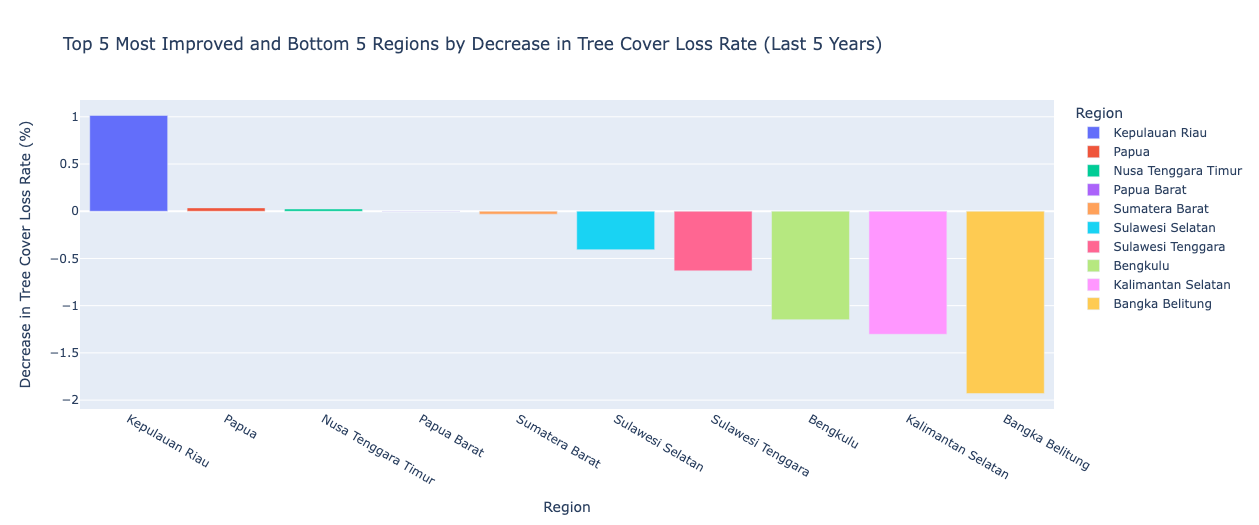

The bar chart emphasizes that Kepulauan Riau, Papua, and Nusa Tenggara Timur have shown notable decreases in deforestation rates, while provinces such as Bangka Belitung, Kalimantan Selatan, and Bengkulu have worsened. This divergence underscores the importance of monitoring not only absolute levels but also recent changes to catch emerging hotspots.

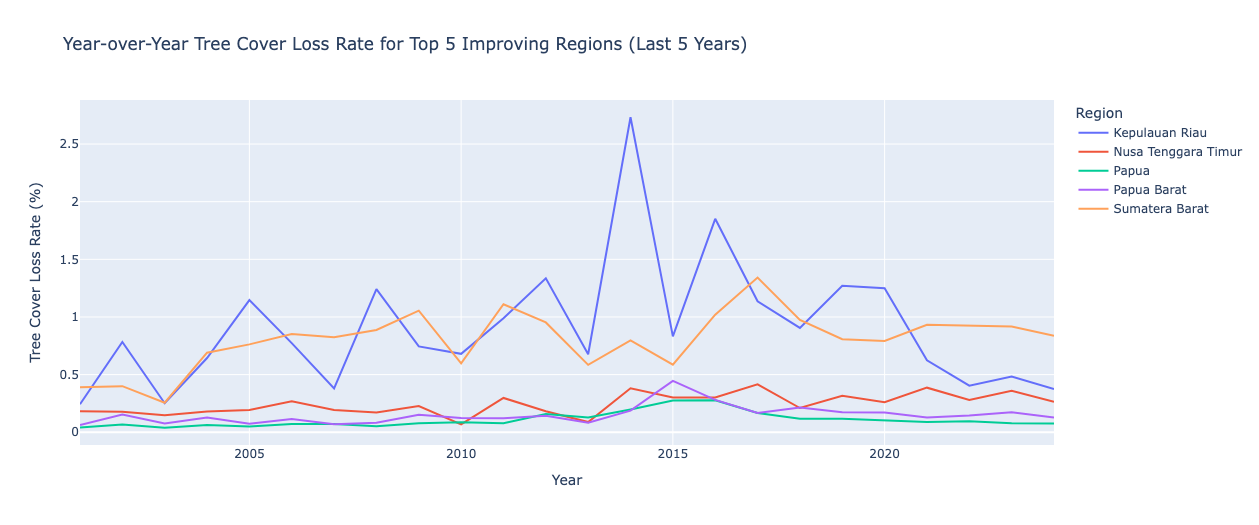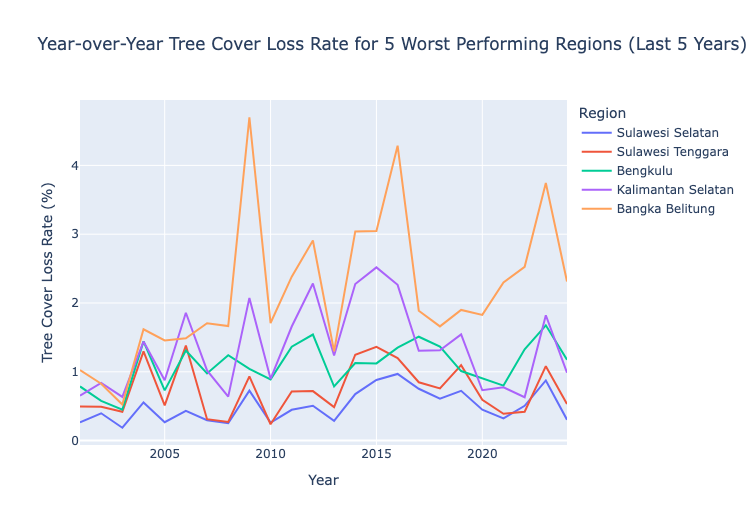

# Discussion

Indonesia’s deforestation is highly uneven both spatially and temporally. The provinces with the largest emissions are those with peat rich forests, where clearing them releases outsized volumes of carbon. Sumatran provinces such as Riau, Jambi, and Sumatera Selatan have the highest loss rate while in Kalimantan, every hectare lost generates far greater carbon emissions than in Riau.

The data shows that deforestation peaked in the mid-2010s before falling in the early 2020s. This is possibly due to  the partial effectiveness of measures such as the [2015 ASEAN agreement on transboundary haze measures.](https://https://asean.org/wp-content/uploads/2021/01/ASEANAgreementonTransboundaryHazePollution-1.pdf) But the trends in recent years demonstrates that these gains are vulnerable.

Thus, these findings highlight that national averages don't show important subnational discrepancies. Policy must focus on protecting high emission peatland provinces, stopping new hotspots, and  ensuring that provinces showing improvement are safeguarded against backsliding.

# Policy Implications



1.   Prioritize peatlands: Provinces like Kalimantan Barat, Tengah, and Timur should be first-order priorities for peatland protection, rewetting, and restoration, given their carbon intensity.
2.   Address emerging hotspots: Provinces with recent increases, such as Bangka Belitung and Kalimantan Selatan, require rapid interventions to prevent entrenched deforestation.
3. Maintain gains in low-loss provinces: Papua, Papua Barat, and Nusa Tenggara Timur should be supported with preventive governance, tenure security, and community-based forest management.
4. Adopt carbon-weighted strategies: Policy should consider not just hectares lost but also emissions per hectare, ensuring interventions maximize climate benefits.

# Conclusion

Over the past twenty years, deforestation in Indonesia has remained largely concentrated in Kalimantan and Sumatra, with peatland provinces driving a disproportionate share of carbon emissions. Although national loss rates have trended downward since the mid-2010s, fluctuations in recent years and the rise of new hotspots such as Bangka Belitung and Kalimantan Selatan show the fragility of this progress.

There are several limitations in this paper, mainly that this paper aims to analyze only the trends, not the actual drivers of the deforestation itself. Further analysis combining drivers of the deforestation is needed to create that causal relationship.

Interventions must be spatially targeted and carbon weighted. Peat rich provinces demand immediate protection and large scale restoration, emerging hotspots require rapid detection and enforcement mechanisms, and regions with consistently low loss need support to maintain their gains. A differentiated, place-based strategy is therefore essential if Indonesia is to reconcile economic development with biodiversity protection and its broader climate commitments.